In [1]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
# these next two lines allow for interactive 3d plots
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# open an event
with open('10_eventinfo_1.txt') as f:
    eventstring = f.read()

event = json.loads(eventstring) # convert from string to dictionary

In [3]:
# Events have four collections included (names on how to call them):
# EcalRecHits:
#     [0]: [x,y,z]
#     [1]: Energy
# HcalRecHits:
#     [0]: [x,y,z]
#     [1]: Energy
# SimParticles:
#     [0]: Track ID
#     [1]: Energy
#     [2]: PDG ID
#     [3]: [x,y,z] <-- (starting vertex)
#     [4]: [x,y,z] <-- (end point)
#     [5]: [px,py,px] <-- momentum
#     [6]: Mass
#     [7]: Charge
#     [8]: Daughters
#     [9]: Parents
# TargetScoringPlaneHits:
#     [0]: [x,y,z] <-- position of hit
#     [1]: Energy
#     [2]: [px,py,pz] <-- momentum
#     [3]: Track ID
#     [4]: PDG ID
# I want to find a way to call these values using the same format as ldmx-sw
# (e.g., getEnergy instead of hit[1] for a HcalRecHit). I will do this later.

In [6]:
########################################################################
################## functions to be used later ##########################

# create a function to assign a track color for each particle
def trackcolor(pdgid):
    c = 'black' # black track by default
    if pdgid == 2212:
        c = 'red' # proton == red
    if pdgid == 2112:
        c = 'green' # neutron == green
    if pdgid == 211:
        c = 'magenta' # pi+ == magenta
    if pdgid == -211:
        c = 'cyan' # pi- == cyan
    if pdgid == 22:
        c = 'gold' # photon == gold
    if pdgid == 130:
        c = 'orange' # K-long == orange
    if pdgid == 310:
        c = 'purple' # K-short == purple
    if pdgid == 321:
        c = 'violet' # K+ == violet
    if pdgid == -321:
        c = 'powderblue' # K- == powder blue
    if pdgid == 11:
        c = 'blue' # electron == blue
    
    return c

# wireframe rending of the ecal coordinates
def hex_coords(ax, center = [0,0], rad=85):
    
    x1 = [center[0]+rad, center[0]+rad/2, center[0]-rad/2, center[0]-rad, center[0]-rad/2, center[0]+rad/2, center[0]+rad]
    y1 = [center[1], center[1]+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2, center[1], center[1]-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2, center[1]]
    
    x2 = [center[0]+rad*3/2+rad, center[0]+rad*3/2+rad/2, center[0]+rad*3/2-rad/2, center[0]+rad*3/2-rad, center[0]+rad*3/2-rad/2, center[0]+rad*3/2+rad/2, center[0]+rad*3/2+rad]
    y2 = [center[1]+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2]
    
    x3 = [center[0]+rad, center[0]+rad/2, center[0]-rad/2, center[0]-rad, center[0]-rad/2, center[0]+rad/2, center[0]+rad]
    y3 = [center[1]+rad*math.sqrt(3), center[1]+rad*math.sqrt(3)+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3), center[1]+rad*math.sqrt(3)-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)]
    
    x4 = [center[0]-rad*3/2+rad, center[0]-rad*3/2+rad/2, center[0]-rad*3/2-rad/2, center[0]-rad*3/2-rad, center[0]-rad*3/2-rad/2, center[0]-rad*3/2+rad/2, center[0]-rad*3/2+rad]
    y4 = [center[1]+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]+rad*math.sqrt(3)/2]
    
    x5 = [center[0]-rad*3/2+rad, center[0]-rad*3/2+rad/2, center[0]-rad*3/2-rad/2, center[0]-rad*3/2-rad, center[0]-rad*3/2-rad/2, center[0]-rad*3/2+rad/2, center[0]-rad*3/2+rad]
    y5 = [center[1]-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2]
    
    x6 = [center[0]+rad, center[0]+rad/2, center[0]-rad/2, center[0]-rad, center[0]-rad/2, center[0]+rad/2, center[0]+rad]
    y6 = [center[1]-rad*math.sqrt(3), center[1]-rad*math.sqrt(3)+rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)+rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3), center[1]-rad*math.sqrt(3)-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)]

    x7 = [center[0]+rad*3/2+rad, center[0]+rad*3/2+rad/2, center[0]+rad*3/2-rad/2, center[0]+rad*3/2-rad, center[0]+rad*3/2-rad/2, center[0]+rad*3/2+rad/2, center[0]+rad*3/2+rad]
    y7 = [center[1]-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2+rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2-rad*math.sqrt(3)/2, center[1]-rad*math.sqrt(3)/2]
    
    z1 = [250,250,250,250,250,250,250]
    z2 = [750,750,750,750,750,750,750]
    
    for i in range(7):
        xl1 = [x1[i],x1[i]]
        xl2 = [x2[i],x2[i]]
        xl3 = [x3[i],x3[i]]
        xl4 = [x4[i],x4[i]]
        xl5 = [x5[i],x5[i]]
        xl6 = [x6[i],x6[i]]
        xl7 = [x7[i],x7[i]]
        
        yl1 = [y1[i],y1[i]]
        yl2 = [y2[i],y2[i]]
        yl3 = [y3[i],y3[i]]
        yl4 = [y4[i],y4[i]]
        yl5 = [y5[i],y5[i]]
        yl6 = [y6[i],y6[i]]
        yl7 = [y7[i],y7[i]]
        
        z = [250,750]
        
        ax.plot(z,xl1,yl1, color='k')
        ax.plot(z,xl2,yl2, color='k')
        ax.plot(z,xl3,yl3, color='k')
        ax.plot(z,xl4,yl4, color='k')
        ax.plot(z,xl5,yl5, color='k')
        ax.plot(z,xl6,yl6, color='k')
        ax.plot(z,xl7,yl7, color='k')
    
    ax.plot(z1,x1,y1, color='k')
    ax.plot(z1,x2,y2, color='k')
    ax.plot(z1,x3,y3, color='k')
    ax.plot(z1,x4,y4, color='k')
    ax.plot(z1,x5,y5, color='k')
    ax.plot(z1,x6,y6, color='k')
    ax.plot(z1,x7,y7, color='k')
    ax.plot(z2,x1,y1, color='k')
    ax.plot(z2,x2,y2, color='k')
    ax.plot(z2,x3,y3, color='k')
    ax.plot(z2,x4,y4, color='k')
    ax.plot(z2,x5,y5, color='k')
    ax.plot(z2,x6,y6, color='k')
    ax.plot(z2,x7,y7, color='k')

<IPython.core.display.Javascript object>


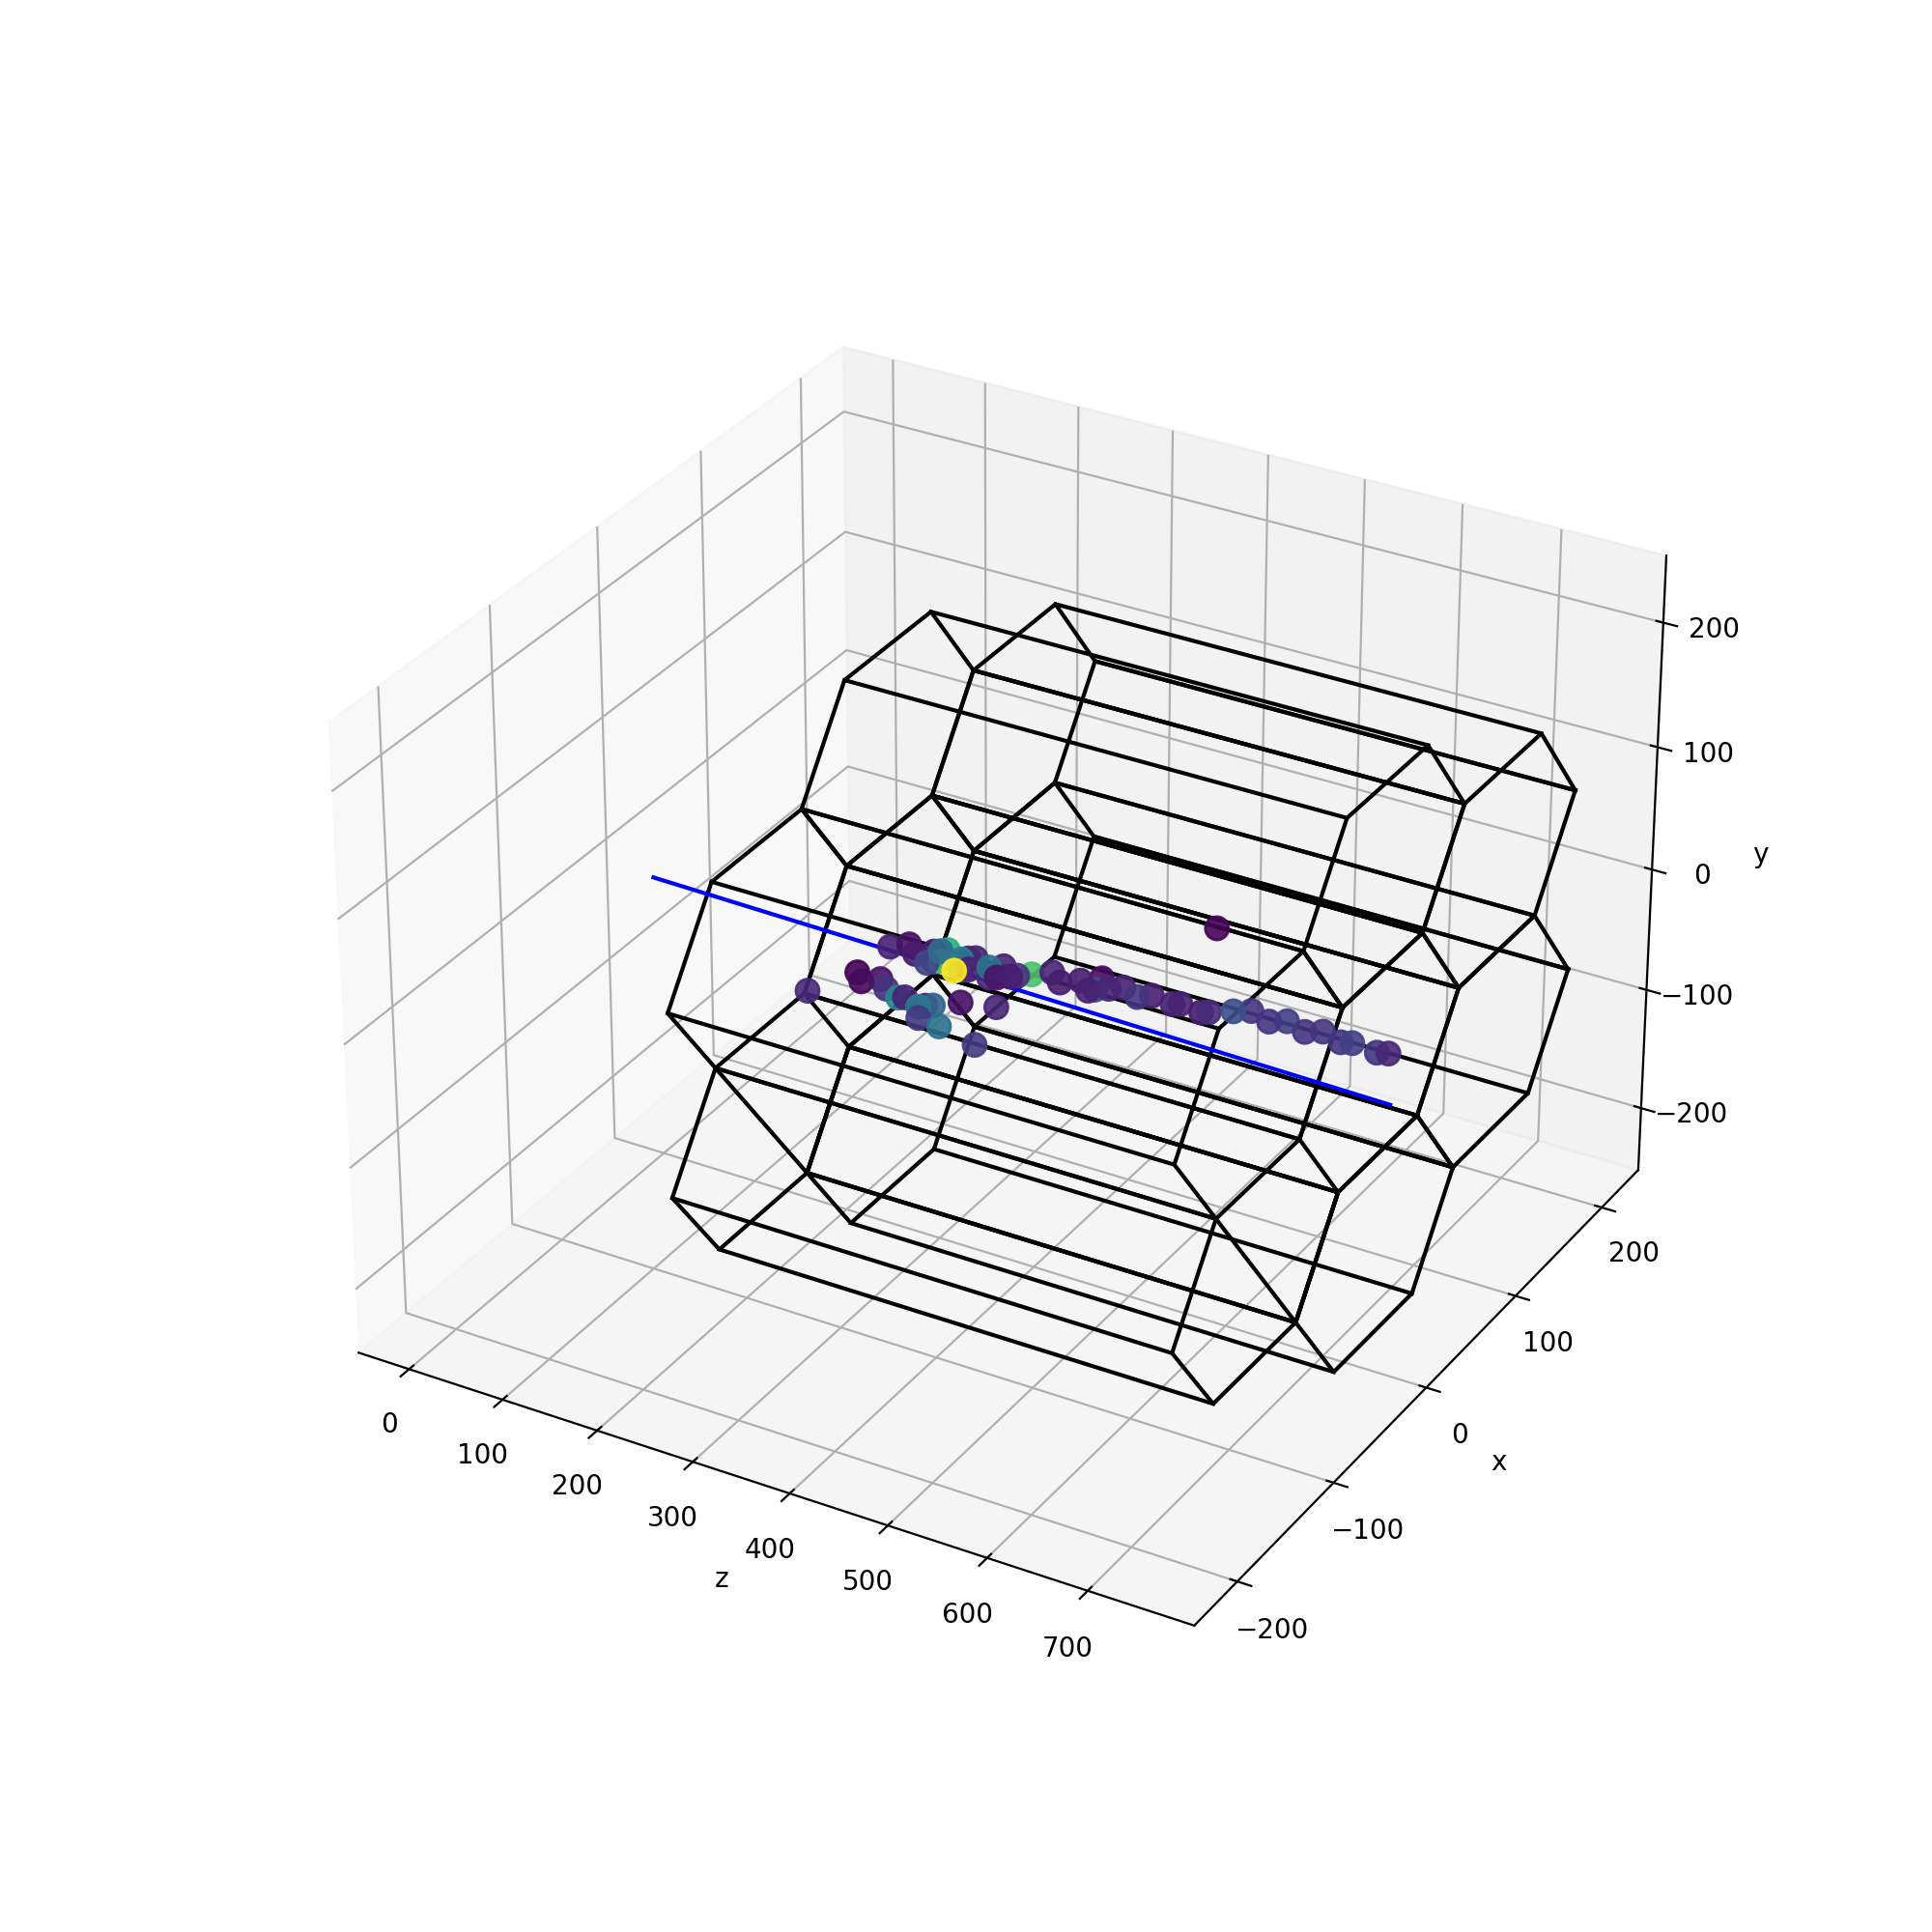

In [7]:
# let's plot the ecal rec hits for this event, along with the trajectory of the recoil electron

# turn the ecal rec hits into a vector
ecal_x = []
ecal_y = []
ecal_z = []
ecal_E = []

for hit in event['EcalRecHits']: # how to loop through the collection
    ecal_x.append(hit[0][0])
    ecal_y.append(hit[0][1])
    ecal_z.append(hit[0][2])
    ecal_E.append(hit[1])
    
# find particle tracks and create collection of lines to draw
lines = []
bremDaughters = []
for sp in event['SimParticles']:
    for hit in event['TargetScoringPlaneHits']:
        if hit[0][2] > 0:
            if sp[0] == hit[3]:
                if sp[2] == 22:
                    if sp[1] >= 2500: # brem photon identified, could be used later
                        bremDaughters.append(sp[8])
                if sp[2] == 11 and 0 in sp[9]:
                    lines.append([[hit[0][0], hit[0][0] + (750 - hit[0][2])*hit[2][0]/hit[2][2]],
                                  [hit[0][1], hit[0][1] + (750 - hit[0][2])*hit[2][1]/hit[2][2]],
                                  [hit[0][2], 750]])
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(ecal_z, ecal_x, ecal_y, c=ecal_E, s=75, alpha=0.9)

hex_coords(ax)

ax.plot(lines[0][2], lines[0][0], lines[0][1], color='b')

ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

plt.show()

In [6]:
# I will work on improving this by adding a wireframe rendering of the detector, but it's not high priority right now

<IPython.core.display.Javascript object>


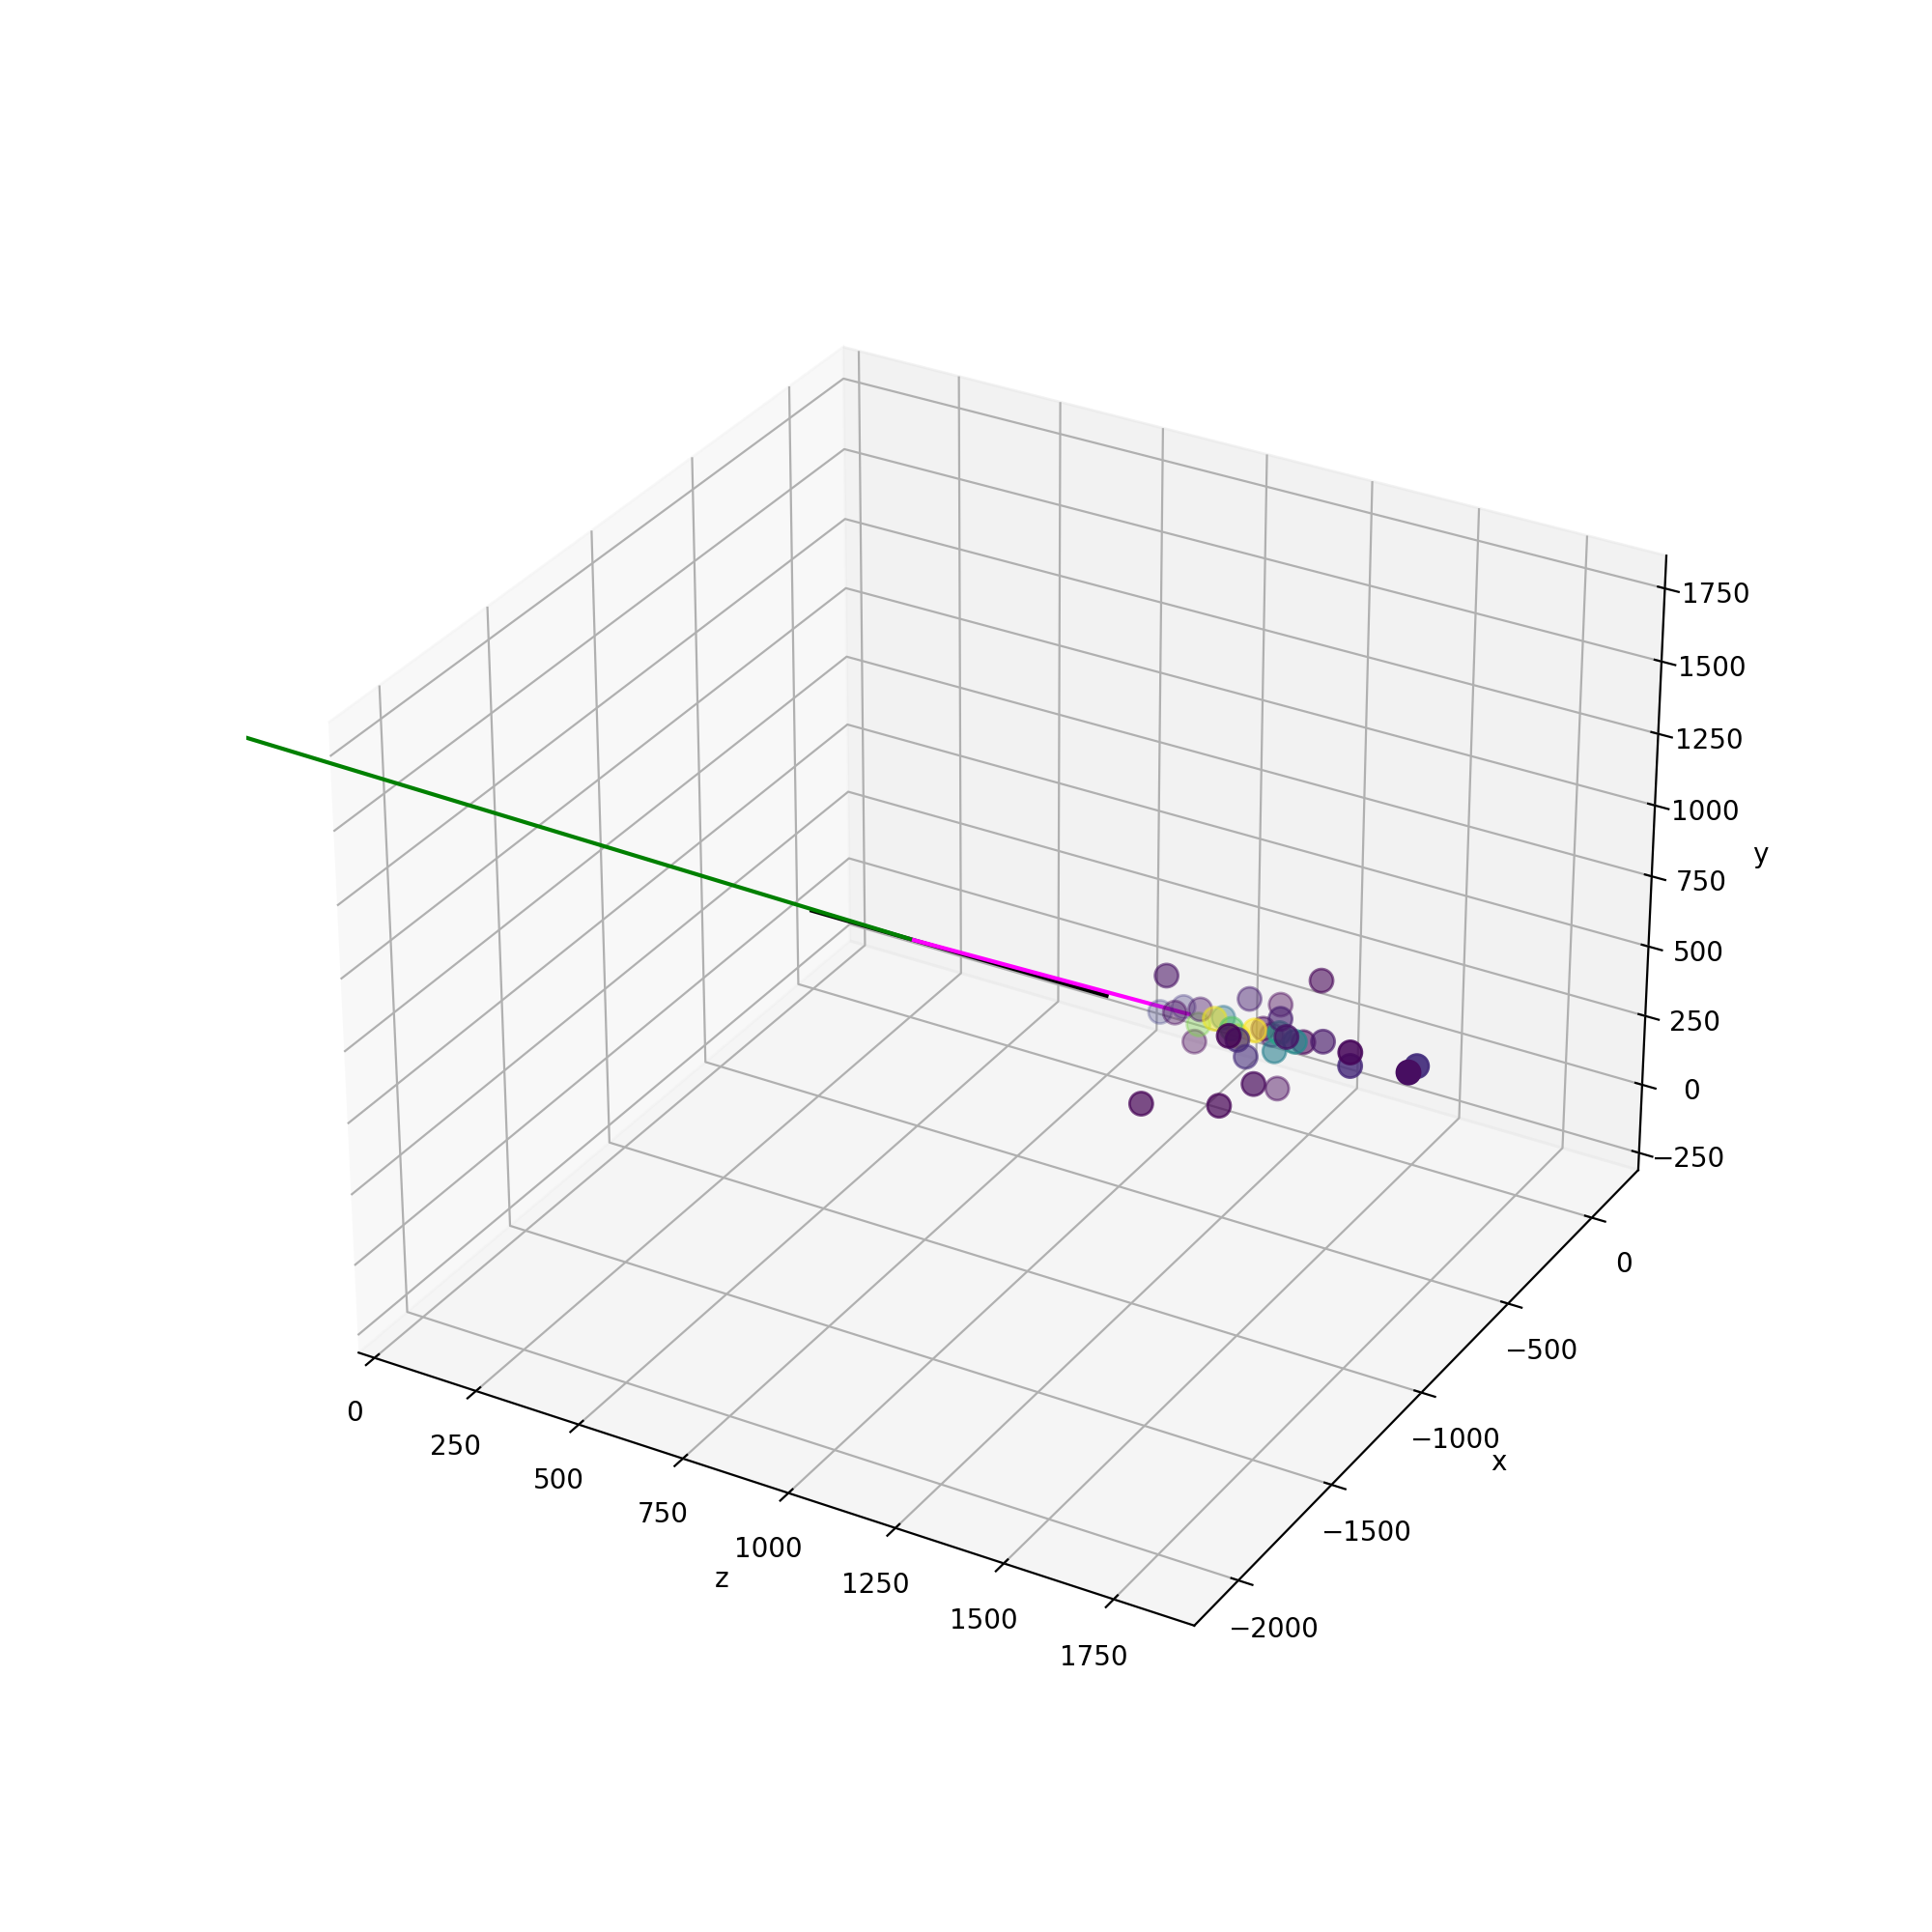

In [11]:
# same thing in hcal now, and brem photon trajectory and the brem daughters

# turn the hcal rec hits into a vector
hcal_x = []
hcal_y = []
hcal_z = []
hcal_E = []

for hit in event['HcalRecHits']: # how to loop through the collection
    hcal_x.append(hit[0][0])
    hcal_y.append(hit[0][1])
    hcal_z.append(hit[0][2])
    hcal_E.append(12.2*hit[1]) # I did not properly scale the hcal energies so to keep fidelity to the original collection

# find particle tracks and create collection of lines to draw
lines = []
colors = []
bremDaughters = []
for sp in event['SimParticles']:
    for hit in event['TargetScoringPlaneHits']:
        if hit[0][2] > 0:
            if sp[0] == hit[3]:
                if sp[2] == 22:
                    if sp[1] >= 2500: # brem photon identified
                        bremDaughters.append(sp[8])
                if sp[2] == 11 and 0 in sp[9]:
                    lines.append([[hit[0][0], hit[0][0] - (750 - hit[0][2])*hit[2][0]/(4000-hit[2][2])],
                                  [hit[0][1], hit[0][1] - (750 - hit[0][2])*hit[2][1]/(4000-hit[2][2])],
                                  [hit[0][2], 750]])
                    colors.append(0) # will get assigned a black track for the photon trajectory
                    
bremdaughterslist = []
for daughters in bremDaughters:
    for daughter in daughters:
        bremdaughterslist.append(daughter)
        
for sp in event['SimParticles']:
    for daughter in bremdaughterslist:
        if sp[0] == daughter:
            lines.append([[sp[3][0], sp[4][0]],
                          [sp[3][1], sp[4][1]],
                          [sp[3][2], sp[4][2]]])
            colors.append(sp[2])
                
                
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(hcal_z, hcal_x, hcal_y, c=hcal_E, s=75)

for i in range(len(lines)):
    ax.plot(lines[i][2], lines[i][0], lines[i][1], color=trackcolor(colors[i]))

ax.axes.set_xlim3d(left=0)
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

plt.show()

<IPython.core.display.Javascript object>


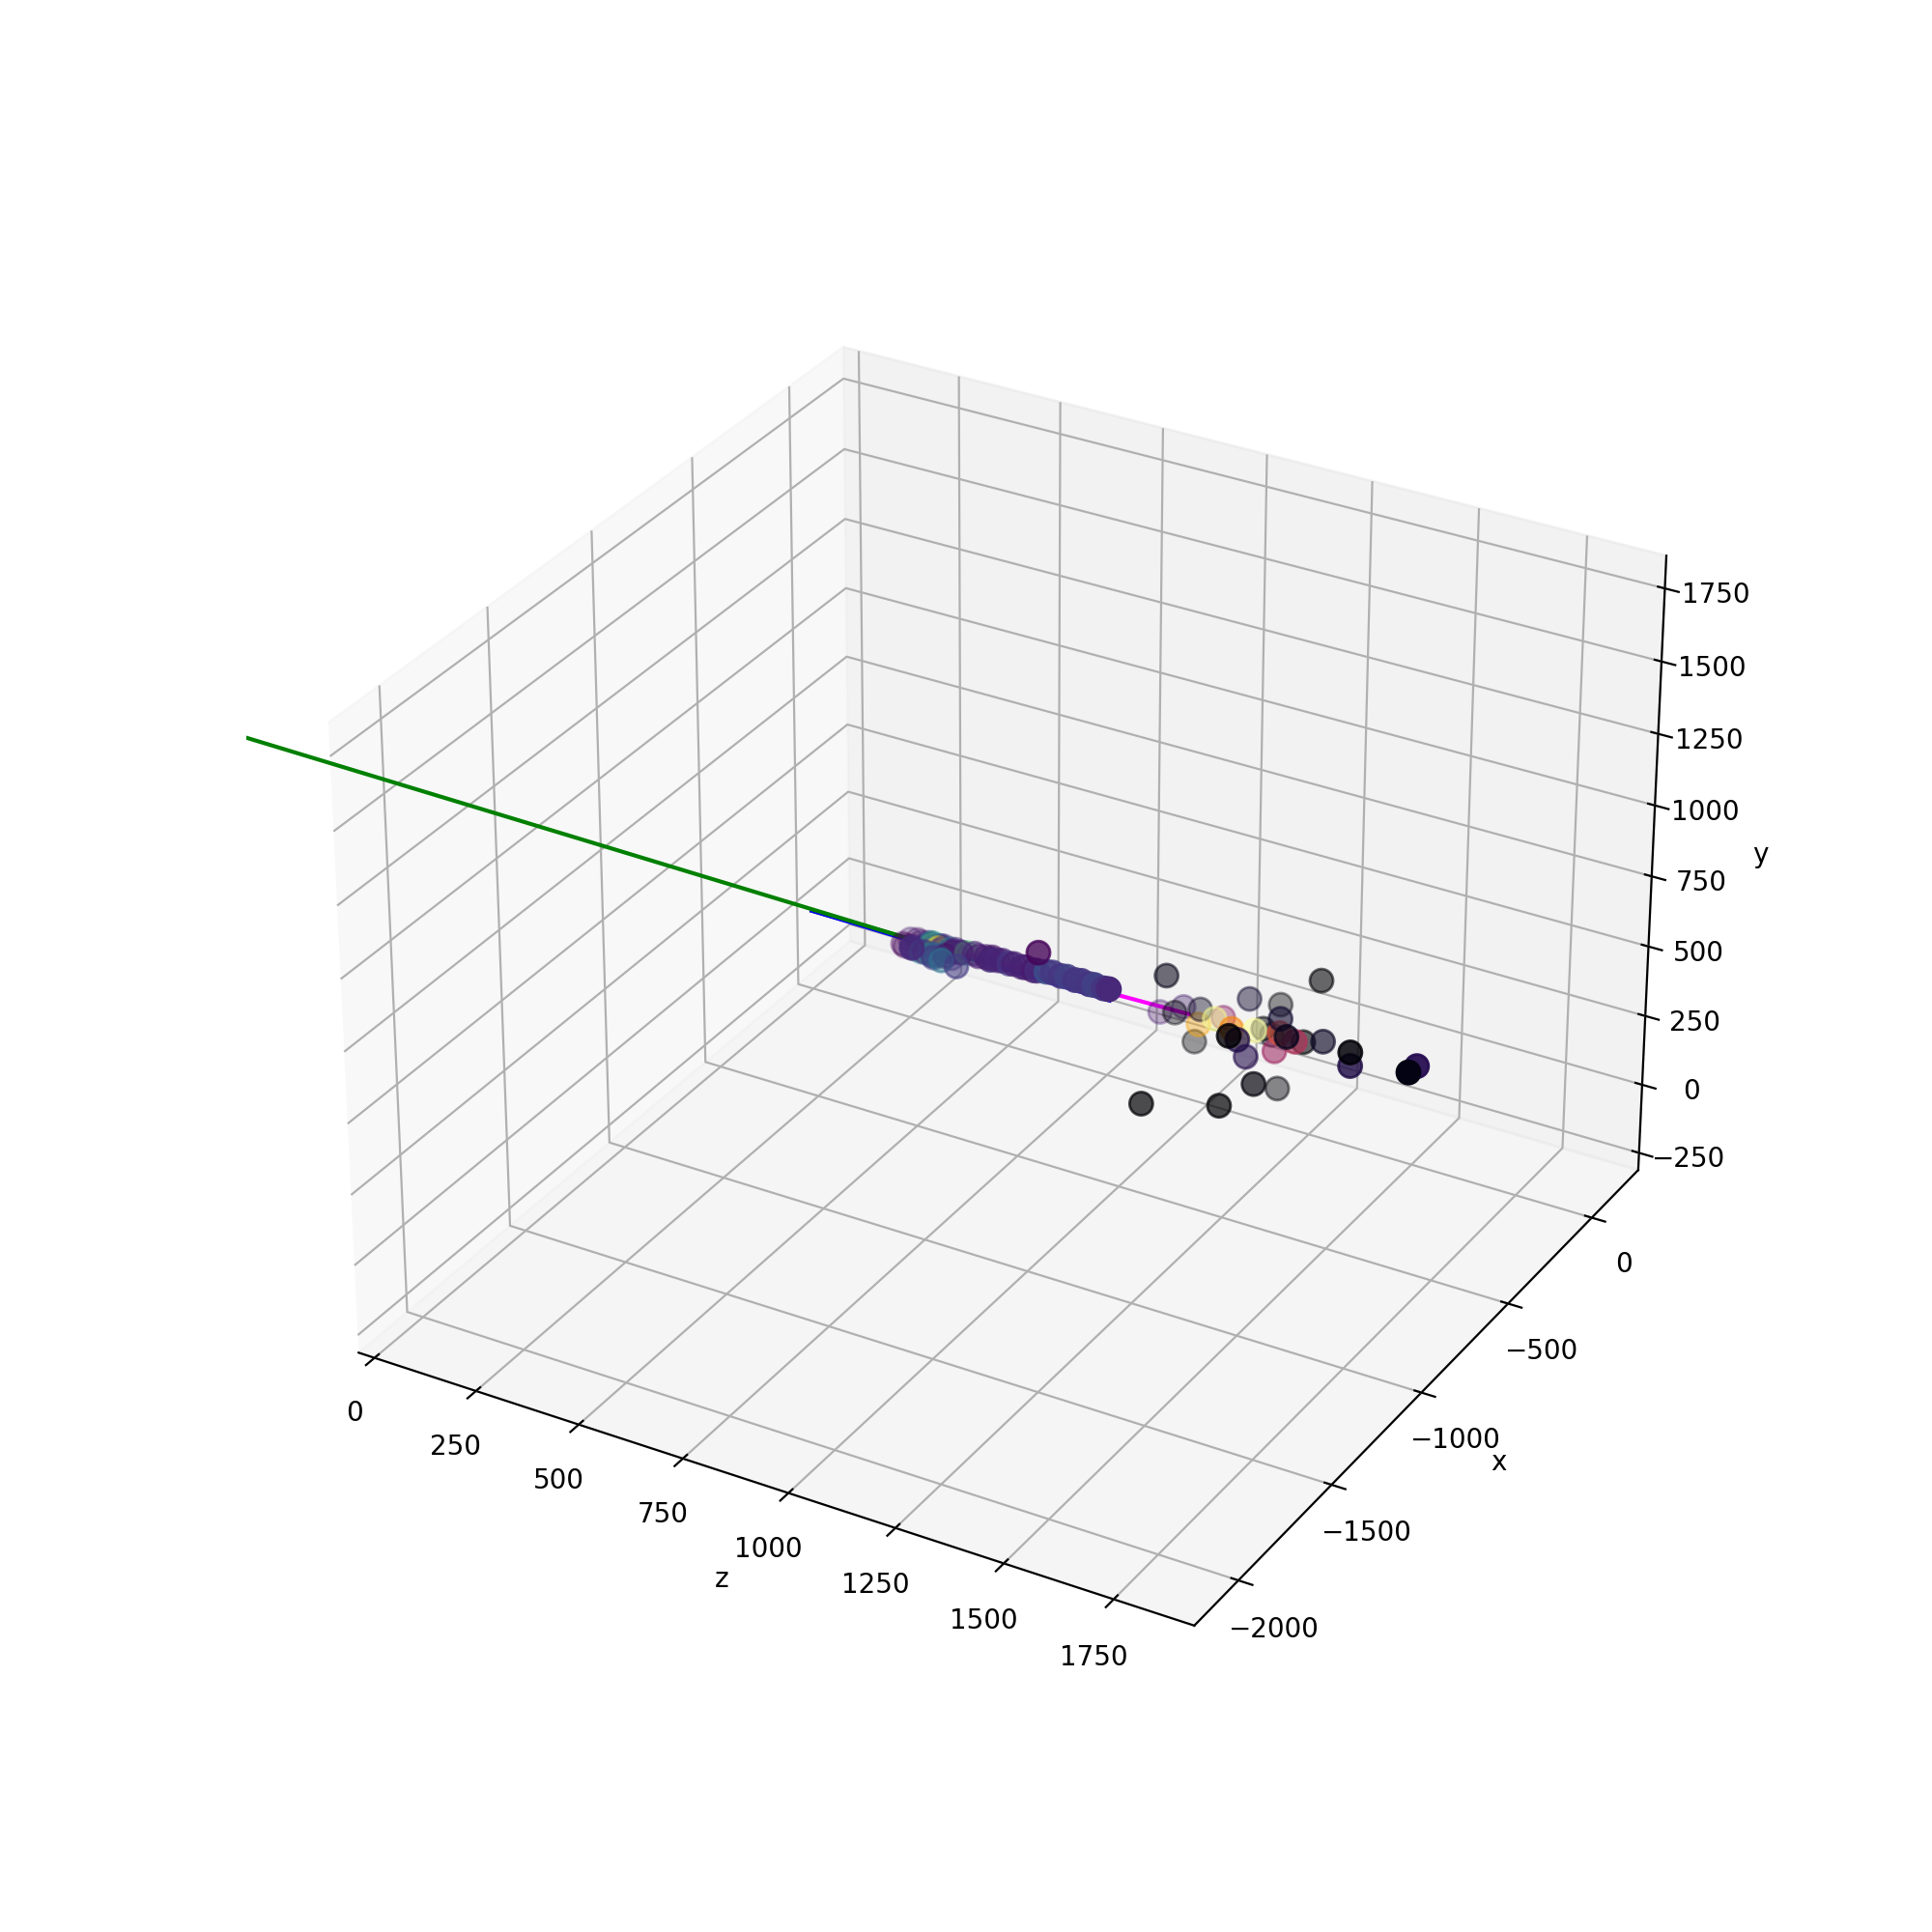

In [9]:
# now let's put it all together

# turn the hcal rec hits into a vector
hcal_x = []
hcal_y = []
hcal_z = []
hcal_E = []

for hit in event['HcalRecHits']: # how to loop through the collection
    hcal_x.append(hit[0][0])
    hcal_y.append(hit[0][1])
    hcal_z.append(hit[0][2])
    hcal_E.append(12.2*hit[1]) # I did not properly scale the hcal energies so to keep fidelity to the original collection

# turn the ecal rec hits into a vector
ecal_x = []
ecal_y = []
ecal_z = []
ecal_E = []

for hit in event['EcalRecHits']: # how to loop through the collection
    ecal_x.append(hit[0][0])
    ecal_y.append(hit[0][1])
    ecal_z.append(hit[0][2])
    ecal_E.append(hit[1])

    
# find particle tracks and create collection of lines to draw
lines = []
colors = []
bremDaughters = []
for sp in event['SimParticles']:
    for hit in event['TargetScoringPlaneHits']:
        if hit[0][2] > 0:
            if sp[0] == hit[3]:
                if sp[2] == 22:
                    if sp[1] >= 2500: # brem photon identified
                        bremDaughters.append(sp[8])
                if sp[2] == 11 and 0 in sp[9]:
                    # brem trajectory first
                    lines.append([[hit[0][0], hit[0][0] - (750 - hit[0][2])*hit[2][0]/(4000-hit[2][2])],
                                  [hit[0][1], hit[0][1] - (750 - hit[0][2])*hit[2][1]/(4000-hit[2][2])],
                                  [hit[0][2], 750]])
                    colors.append(0) # will get assigned a black track for the photon trajectory
                    # now the recoil electron
                    lines.append([[hit[0][0], hit[0][0] + (750 - hit[0][2])*hit[2][0]/hit[2][2]],
                                  [hit[0][1], hit[0][1] + (750 - hit[0][2])*hit[2][1]/hit[2][2]],
                                  [hit[0][2], 750]])
                    colors.append(11)
                    
bremdaughterslist = []
for daughters in bremDaughters:
    for daughter in daughters:
        bremdaughterslist.append(daughter)
        
for sp in event['SimParticles']:
    for daughter in bremdaughterslist:
        if sp[0] == daughter:
            lines.append([[sp[3][0], sp[4][0]],
                          [sp[3][1], sp[4][1]],
                          [sp[3][2], sp[4][2]]])
            colors.append(sp[2])
                
                
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(hcal_z, hcal_x, hcal_y, c=hcal_E, s=75, cmap='inferno')
ax.scatter(ecal_z, ecal_x, ecal_y, c=ecal_E, s=75, cmap='viridis')

#hex_coords(ax)

for i in range(len(lines)):
    ax.plot(lines[i][2], lines[i][0], lines[i][1], color=trackcolor(colors[i]))

ax.axes.set_xlim3d(left=0)
ax.set_xlabel('z')
ax.set_ylabel('x')
ax.set_zlabel('y')

plt.show()